In [1]:
import os 
import gc
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from functools import wraps
import matplotlib.pyplot as plt
from collections import defaultdict

### Extract Accelerometer Data

In [2]:
len(os.listdir('./child-mind-institute-problematic-internet-use/series_train.parquet/'))

996

In [3]:
def data_extract(data):
    result = defaultdict()
    result['records'] = len(data)
    result['non_wear_ratio'] = round(len(data.loc[data['non-wear_flag'] == 1]) / len(data), 2)
    tmp_data = data.copy()
    tmp_data['pre_wear_flag'] = tmp_data['non-wear_flag'].shift(1)
    # diff
    for col in ['X', 'Y', 'Z', 'enmo', 'anglez']:
        tmp_data[f'diff_{col}'] = tmp_data[col].diff()
        result[f'diffmax_{col}'] = tmp_data.loc[(tmp_data['non-wear_flag'] == 0) & (tmp_data['pre_wear_flag'] == 0), f'diff_{col}'].max()
        result[f'diffmean_{col}'] = tmp_data.loc[(tmp_data['non-wear_flag'] == 0) & (tmp_data['pre_wear_flag'] == 0), f'diff_{col}'].mean()
    tmp_data = data.loc[data['non-wear_flag'] == 0]
    for col in ['X', 'Y', 'Z', 'enmo', 'anglez']:
        result[f'max_{col}'] = tmp_data[col].max()
        result[f'min_{col}'] = tmp_data[col].min()
        result[f'mean_{col}'] = tmp_data[col].mean()
    return pd.DataFrame([result])

In [4]:
df = pd.DataFrame()
for file in os.listdir('./child-mind-institute-problematic-internet-use/series_train.parquet/'):
    tmp_data = pd.read_parquet(f'./child-mind-institute-problematic-internet-use/series_train.parquet/{file}/part-0.parquet')
    result = data_extract(tmp_data)
    result['id'] = file.split('=')[1]
    df = pd.concat([df, result])
    del tmp_data, result
    gc.collect()

In [5]:
df

,records,non_wear_ratio,diffmax_X,diffmean_X,diffmax_Y,diffmean_Y,diffmax_Z,diffmean_Z,diffmax_enmo,diffmean_enmo,...,max_Z,min_Z,mean_Z,max_enmo,min_enmo,mean_enmo,max_anglez,min_anglez,mean_anglez,id
0,43330,0.00,1.619974,1.778507e-05,1.825443,3.422309e-06,1.849974,1.406119e-05,3.216479,9.288377e-07,...,1.546979,-1.048372,-0.167890,4.004276,0.0,0.047388,89.751656,-89.833092,-10.580416,00115b9f
0,396396,0.64,1.727945,5.883475e-07,1.607550,1.695280e-05,1.794724,7.408412e-06,1.826717,3.329563e-07,...,1.146284,-1.018787,0.043286,2.952888,0.0,0.016461,89.476036,-88.709778,1.594461,001f3379
0,414384,0.17,1.725880,1.878932e-06,1.787241,-2.105229e-06,1.766166,8.730542e-06,3.926326,2.621258e-07,...,2.239939,-1.016758,0.343440,4.041167,0.0,0.036441,89.862823,-89.463226,22.909386,00f332d1
0,370956,0.03,1.716110,-1.064248e-07,1.818731,-9.227978e-07,1.796478,5.582314e-06,1.992610,-8.402020e-07,...,1.299293,-1.022549,-0.300906,4.097965,0.0,0.033677,88.478432,-89.877220,-21.164793,01085eb3
0,97048,0.00,2.354601,2.727147e-06,2.892552,6.486332e-06,2.073520,3.167637e-06,4.610145,-4.175748e-08,...,2.321265,-1.003249,-0.061682,6.307294,0.0,0.058280,88.389679,-89.308716,-5.059758,012cadd8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,426684,0.13,1.757441,-3.238177e-06,2.896269,-3.188445e-06,1.815382,-5.245981e-06,3.207767,-3.234958e-07,...,1.975501,-1.018975,0.098482,4.031051,0.0,0.045263,89.431595,-89.827454,6.224306,fe9c71d8
0,414300,0.93,1.359541,-4.140738e-05,1.884034,-1.633879e-05,1.757043,4.379713e-05,0.809264,3.187100e-05,...,1.011122,-1.009817,-0.437110,1.179653,0.0,0.015427,89.310356,-89.936836,-37.496407,fecc07d6
0,384900,0.00,1.815611,4.287432e-07,2.245138,8.686400e-07,1.910752,-1.836843e-07,3.350441,3.855055e-07,...,1.728032,-1.350506,-0.042806,3.683850,0.0,0.053595,89.768860,-89.744629,-3.630944,ff18b749
0,416275,0.02,1.876238,-1.900459e-06,2.119546,6.477445e-07,2.002640,2.419548e-06,2.885285,2.420443e-07,...,1.468296,-1.006157,-0.212830,3.078876,0.0,0.028744,89.693832,-89.627525,-14.238316,ffcd4dbd


In [6]:
df.to_csv('parse_data.csv', index=False)

### Accelerometer Data by Sii

In [7]:
train = pd.read_csv('./child-mind-institute-problematic-internet-use/train.csv')

In [8]:
df = df.merge(train[['sii', 'id']], how='left', on='id')

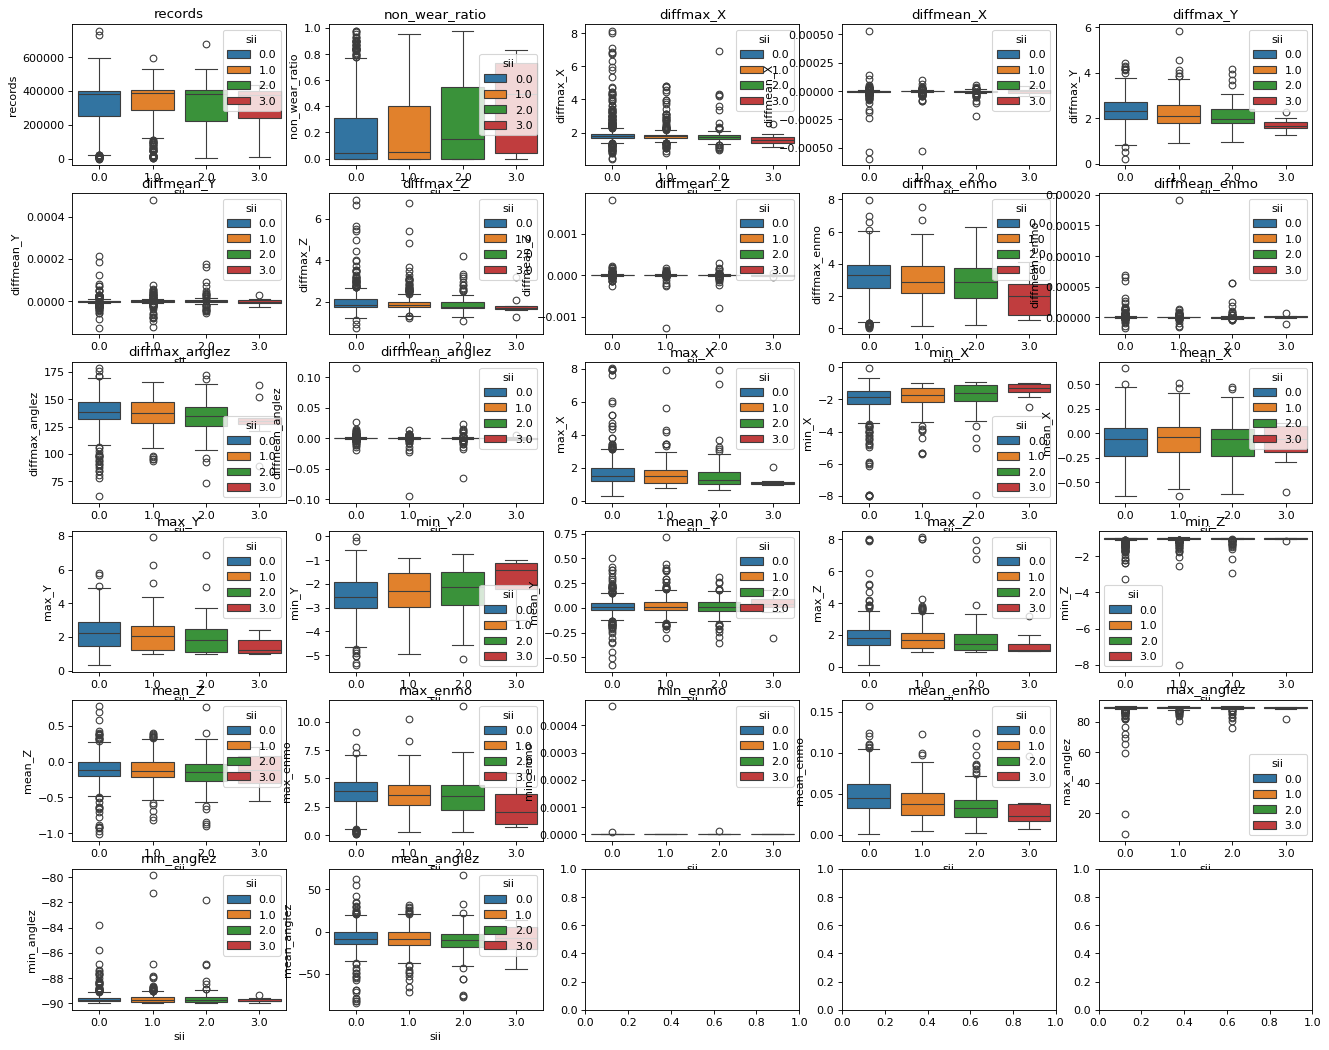

In [9]:
fig, axes = plt.subplots(6, 5, figsize = (20, 16), dpi=80)
c = 0
r = 0
for i in df.columns[:-2]:
    sns.boxplot(data=df, x='sii', y=i, hue='sii', ax=axes[r][c], palette="tab10").set_title(f'{i}')
    c += 1
    if c > 4:
        c = 0
        r += 1

### Accelerometer: Sii.0 vs Sii.3

Pick a balanced target: c308b134

In [10]:
df.loc[df['sii'] == 3, ['records', 'id', 'non_wear_ratio']]

,records,id,non_wear_ratio
226,434892,35fa2ebf,0.80
375,254799,5e55e9fd,0.54
490,399744,7f44236f,0.47
498,415596,8148c785,0.83
615,10670,9eb283e4,0.00
627,236603,a08ebf6e,0.00
671,14442,aaefeff0,0.00
730,391236,bc4eaf77,0.81
753,363624,c308b134,0.52
855,399780,df556fd2,0.17


In [11]:
df.loc[(df['sii'] == 0) & (df['records'] == max(df.loc[df['sii'] == 0 , 'records'])), ['records', 'id', 'non_wear_ratio']]

,records,id,non_wear_ratio
173,756212,2a88cbe9,0.31


In [12]:
sii0_id = '2a88cbe9'
sii3_id = 'c308b134'
sii0 = pd.read_parquet(f'./child-mind-institute-problematic-internet-use/series_train.parquet/id={sii0_id}/part-0.parquet')
sii3 = pd.read_parquet(f'./child-mind-institute-problematic-internet-use/series_train.parquet/id={sii3_id}/part-0.parquet')

In [13]:
def sii_compared(data1, data2):
    fig, axes = plt.subplots(4, 3, figsize = (20, 16), dpi=80)
    c = 0
    r = 0
    for i in data1.columns[1:]:
        sns.lineplot(data=data1, x=np.arange(0, len(data1)), y=i, ax=axes[r][c], label='sii0')
        sns.lineplot(data=data2, x=np.arange(0, len(data2)), y=i, ax=axes[r][c], label='sii3').set_title(f'{i}')
        c += 1
        if c > 2:
            c = 0
            r += 1

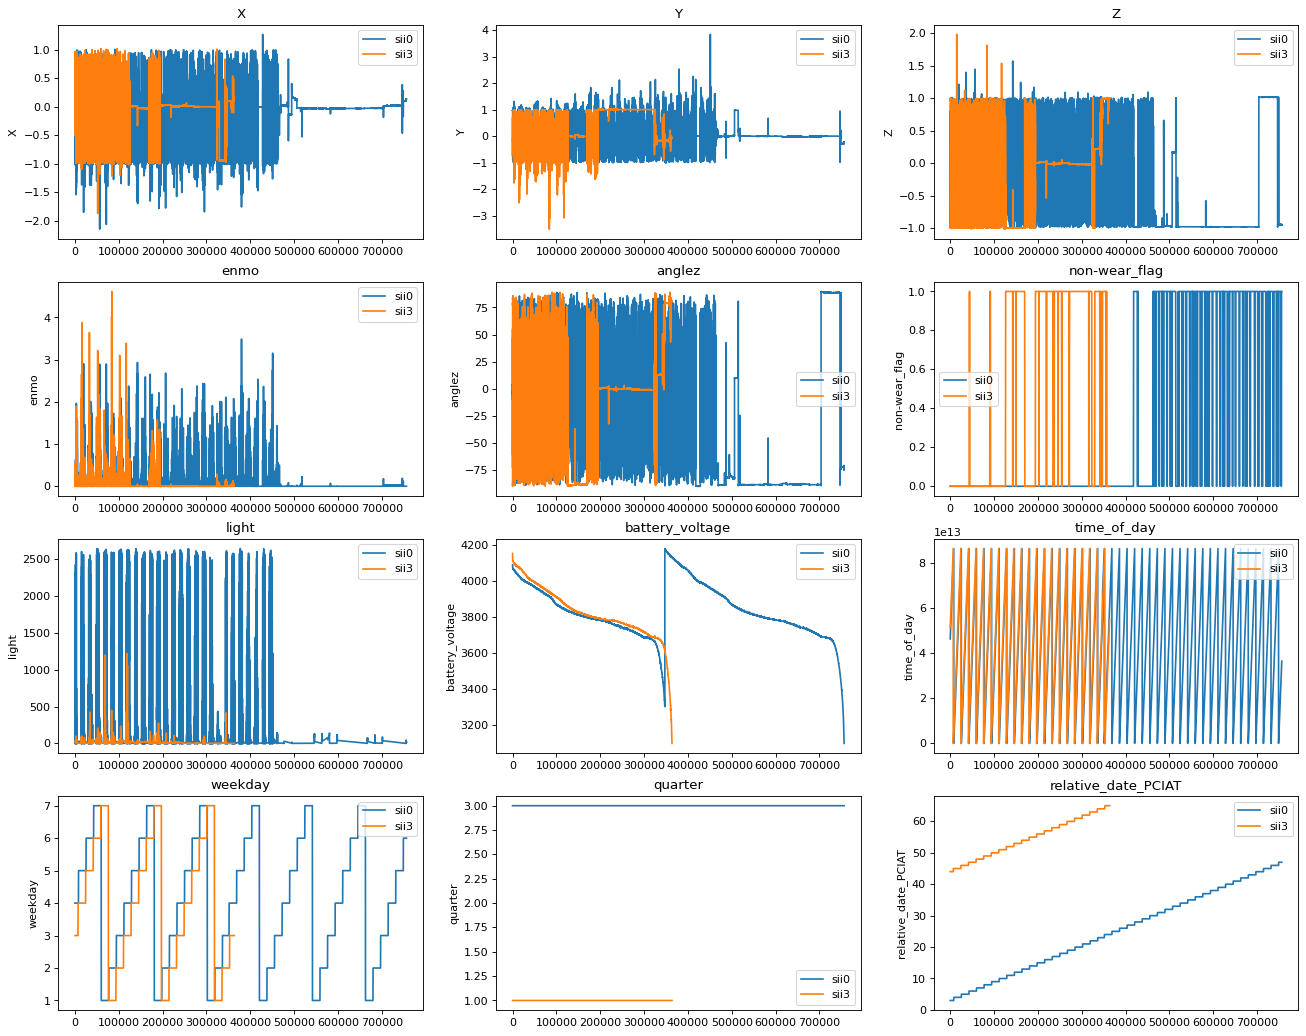

In [14]:
sii_compared(sii0, sii3)

### Accelerometer: Sii.0 non-wear vs wear

In [15]:
def wear_compared(data):
    fig, axes = plt.subplots(4, 3, figsize = (20, 16), dpi=80)
    c = 0
    r = 0
    tmp_data2 = data.loc[data['non-wear_flag'] == 0]
    tmp_data1 = data.loc[data['non-wear_flag'] == 1]
    for i in data.columns[1:]:
        sns.lineplot(data=tmp_data2, x=np.arange(0, len(tmp_data2)), y=i, ax=axes[r][c], label='Wear').set_title(f'{i}')
        sns.lineplot(data=tmp_data1, x=np.arange(0, len(tmp_data1)), y=i, ax=axes[r][c], label='Non Wear')
        c += 1
        if c > 2:
            c = 0
            r += 1

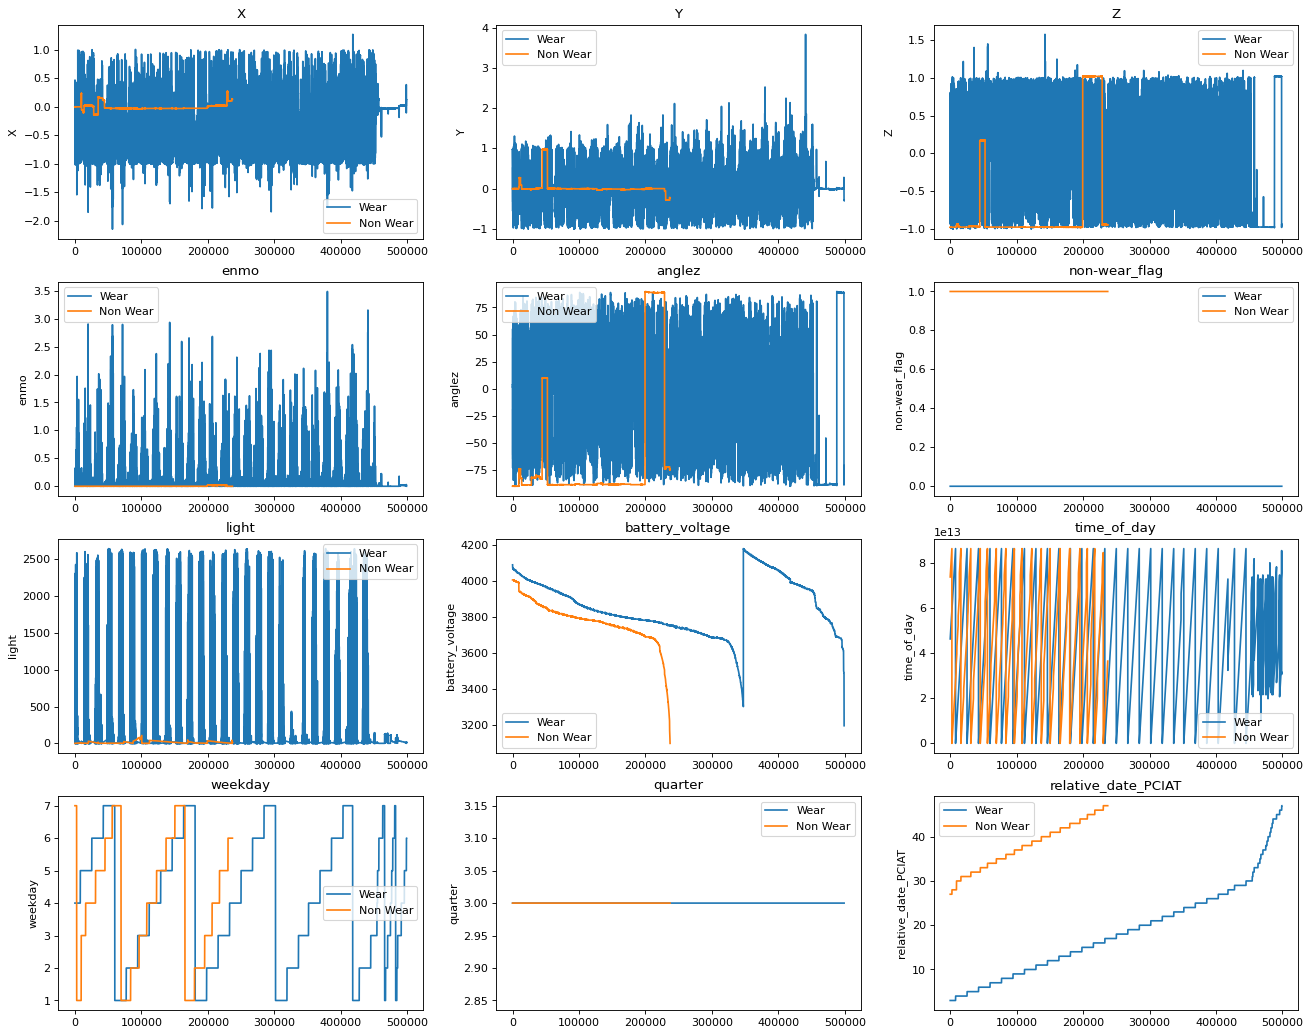

In [16]:
wear_compared(sii0)

### Accelerometer: Sii.3 non-wear vs wear

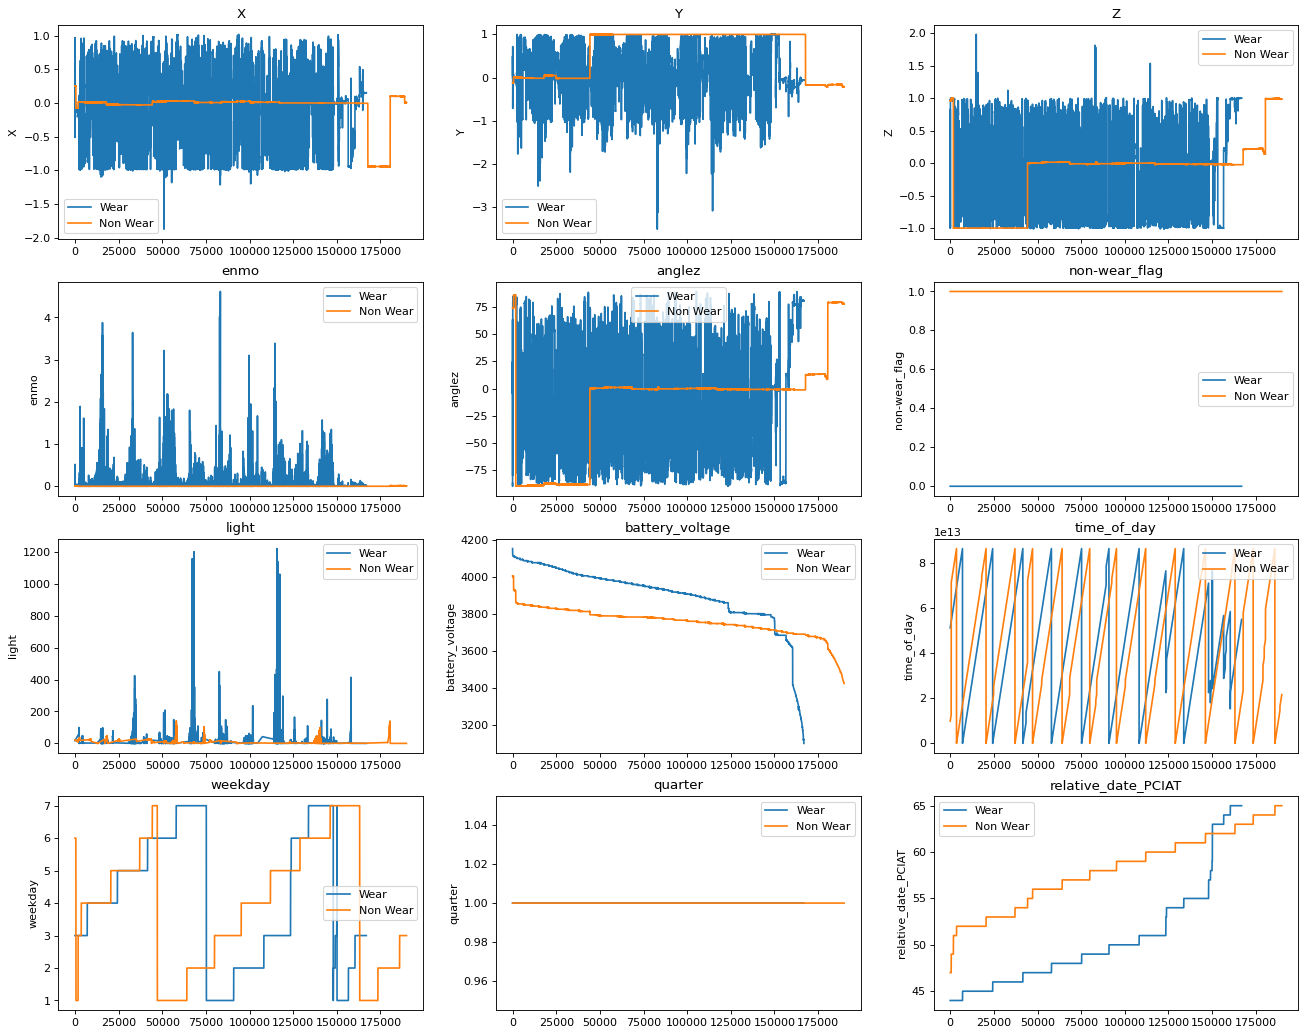

In [17]:
wear_compared(sii3)

It is very obvious that there are different patterns between wear and non wear.  
If we want to distinguish the sii, perhaps just need to consider the wear data.

### Accelerometer: Sii.0 vs Sii.3 non-wear

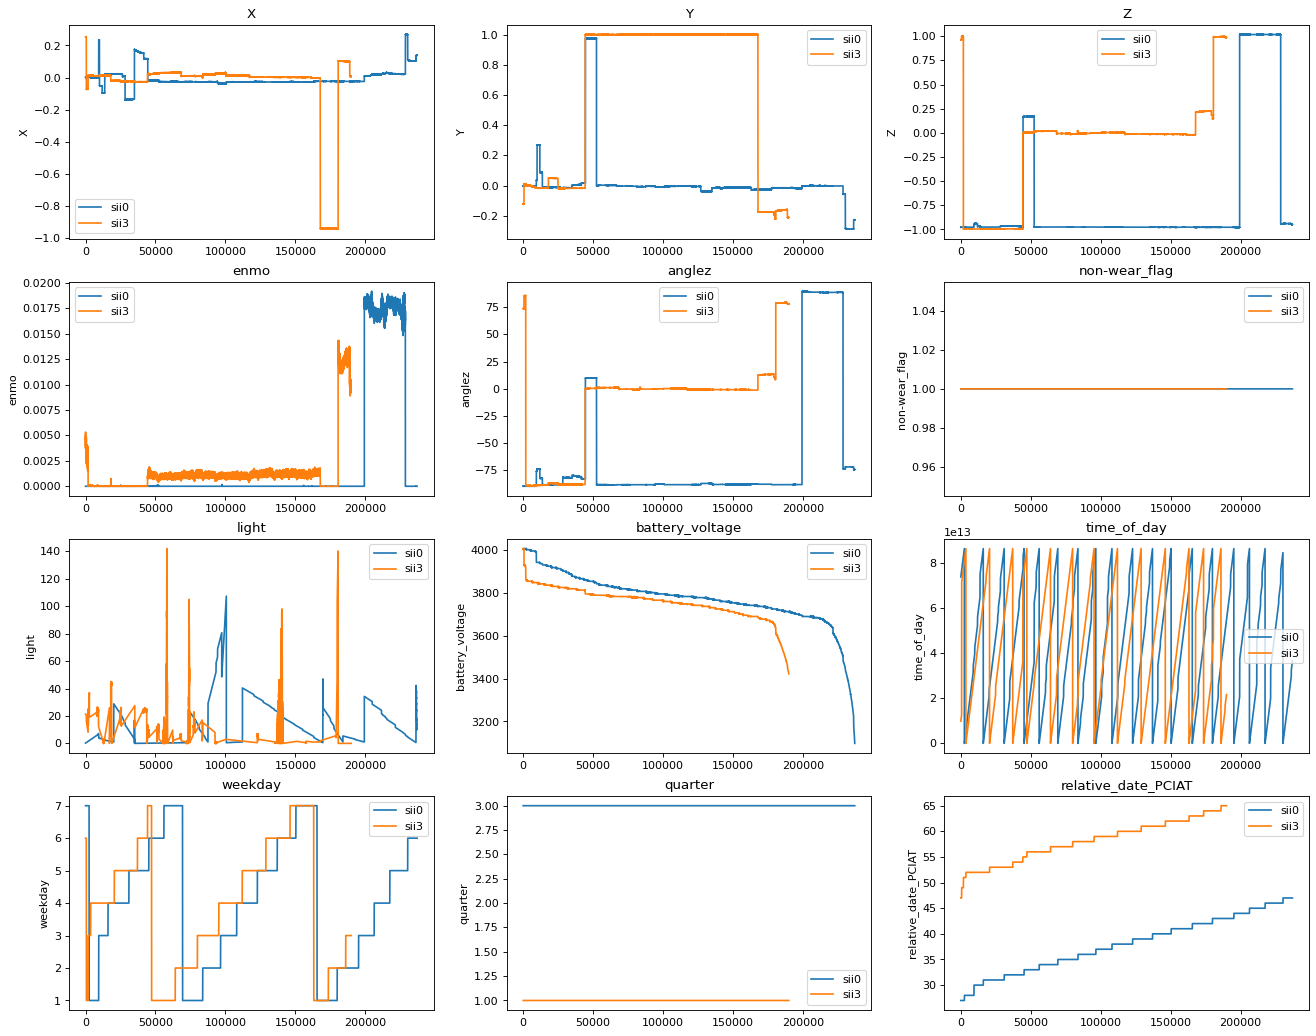

In [18]:
sii_compared(sii0.loc[sii0['non-wear_flag'] == 1], sii3.loc[sii3['non-wear_flag'] == 1])

### Accelerometer: Sii.0 vs Sii.3 wear

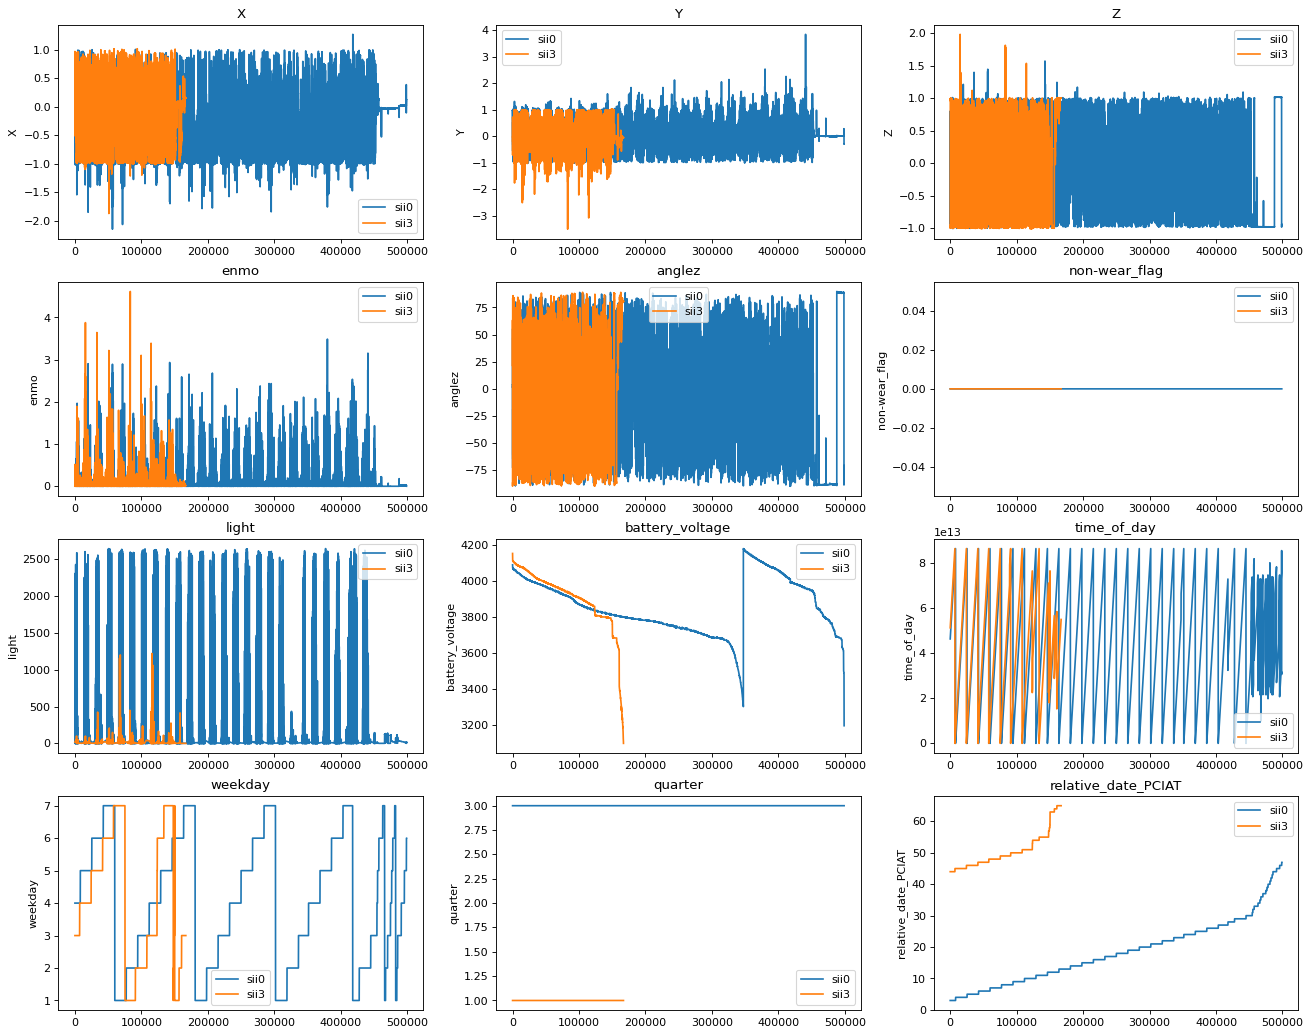

In [19]:
sii_compared(sii0.loc[sii0['non-wear_flag'] == 0], sii3.loc[sii3['non-wear_flag'] == 0])

Y: sii3 has apparently negative values  
Enmo: sii3 with higher fluctuation  
light: sii0 commonly stays in bright environment

### Instrument Data

In [20]:
train.select_dtypes(['int', 'float'])

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,3.0,2.0
1,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.0,64.0,0.0,0.0
2,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,0.0,2.0,2.0,1.0,1.0,28.0,38.0,54.0,2.0,0.0
3,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,3.0,4.0,3.0,4.0,1.0,44.0,31.0,45.0,0.0,1.0
4,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,...,0.0,2.0,1.0,1.0,0.0,32.0,35.0,50.0,1.0,1.0
3956,10,0,NaN,18.764678,53.5,76.4,27.0,60.0,78.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3957,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,...,0.0,1.0,1.0,0.0,1.0,31.0,56.0,77.0,0.0,1.0
3958,13,0,70.0,12.235895,70.7,87.0,NaN,59.0,61.0,113.0,...,1.0,1.0,1.0,1.0,1.0,19.0,33.0,47.0,1.0,0.0


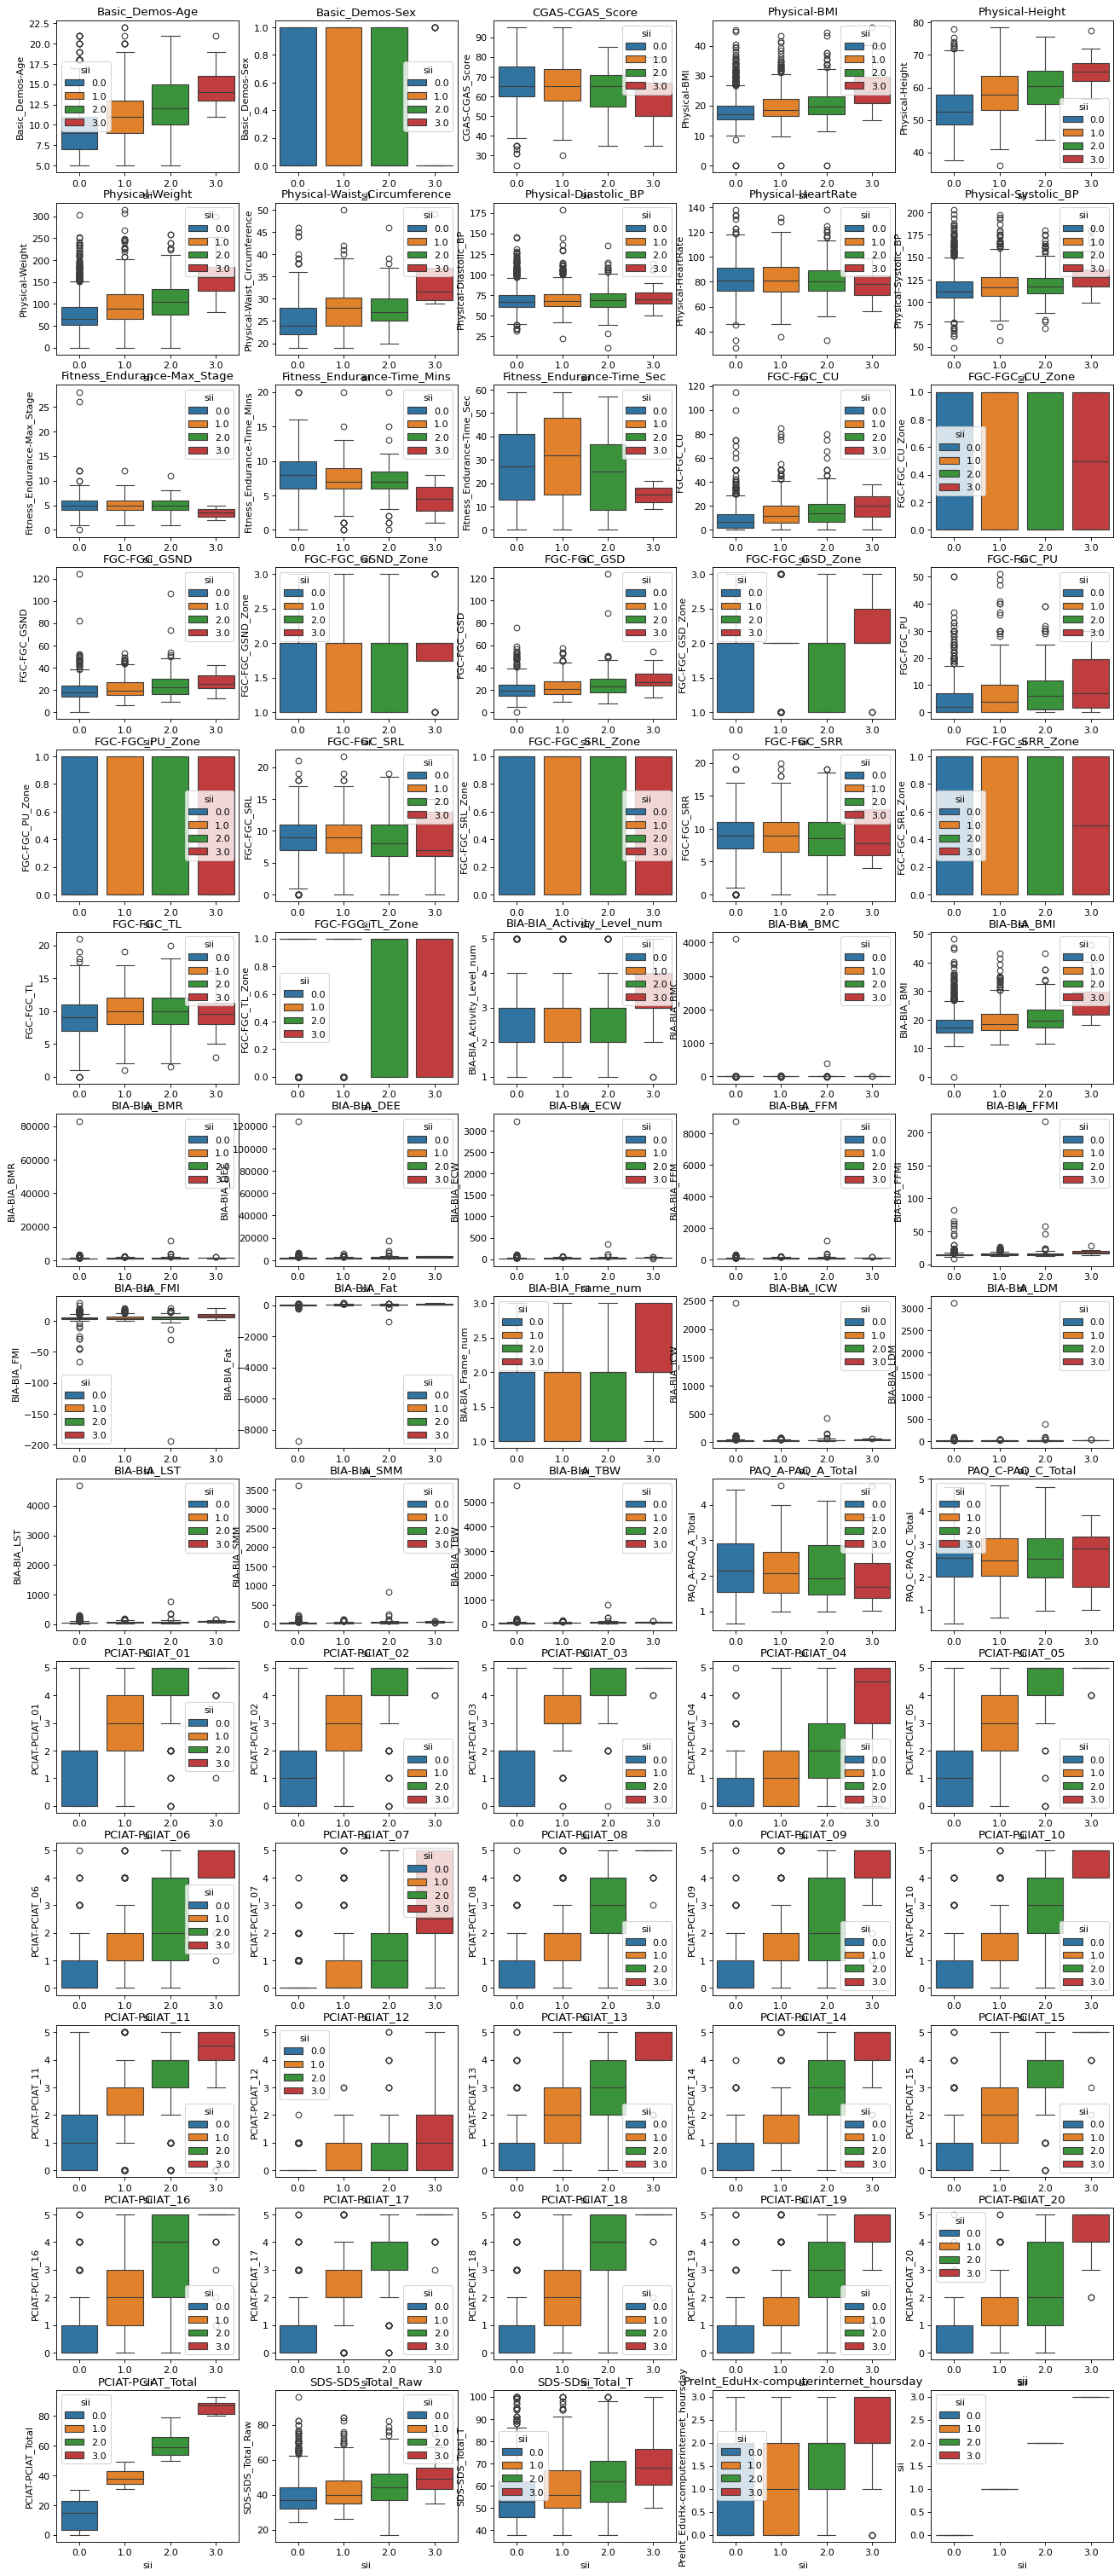

In [21]:
fig, axes = plt.subplots(14, 5, figsize = (20, 48), dpi=80)
c = 0
r = 0
for i in train.select_dtypes(['int', 'float']):
    sns.boxplot(data=train, x='sii', y=i, hue='sii', ax=axes[r][c], palette="tab10").set_title(f'{i}')
    c += 1
    if c > 4:
        c = 0
        r += 1

A lot of instrumental values have significant difference between four groups of sii.

### Statistic

1. Purpose: find out what metrics could effectivly differenciate sii3 with other kinds of sii 
2. I will use non-parameter method: Mann-Whitney test to evalute the difference bettwen sii3 and other three groups  

In [22]:
import scipy.stats as stats

#### Accelerometer

In [23]:
acc_mann = pd.DataFrame()
for col in df.columns.difference(['id', 'sii']):
    for cat, cat_n in zip(['sii0', 'sii1', 'sii2'], [0, 1, 2]):
        r = stats.mannwhitneyu(df.loc[df['sii'] == 3, col], df.loc[df['sii'] == cat_n, col])
        acc_mann = pd.concat([acc_mann, pd.DataFrame([[col, cat, r.statistic, r.pvalue]])])
acc_mann.columns = ['column_name', 'sii', 'statistic', 'p_value']

In [24]:
acc_mann

,column_name,sii,statistic,p_value
0,diffmax_X,sii0,1568.0,0.012193
0,diffmax_X,sii1,769.0,0.023700
0,diffmax_X,sii2,453.0,0.074921
0,diffmax_Y,sii0,878.0,0.000150
0,diffmax_Y,sii1,564.0,0.002007
...,...,...,...,...
0,non_wear_ratio,sii1,1711.0,0.116112
0,non_wear_ratio,sii2,807.0,0.341888
0,records,sii0,2869.0,0.932501
0,records,sii1,1248.0,0.742229


In [25]:
acc_mann = acc_mann.pivot_table(columns='sii', index='column_name', values='p_value').reset_index()
acc_mann['all_significant_05'] = acc_mann.apply(lambda x: True if all(x[['sii0', 'sii1', 'sii2']] <= 0.05) else False, axis=1)
acc_mann['all_significant_001'] = acc_mann.apply(lambda x: True if all(x[['sii0', 'sii1', 'sii2']] <= 0.01) else False, axis=1)
acc_mann['any_significant_05'] = acc_mann.apply(lambda x: True if any(x[['sii0', 'sii1', 'sii2']] <= 0.05) else False, axis=1)
acc_mann['any_significant_001'] = acc_mann.apply(lambda x: True if any(x[['sii0', 'sii1', 'sii2']] <= 0.01) else False, axis=1)

In [26]:
acc_mann.loc[acc_mann[['all_significant_05', 'all_significant_001', 'any_significant_05', 'any_significant_001']].apply(lambda x: any(x), axis=1)]

sii,column_name,sii0,sii1,sii2,all_significant_05,all_significant_001,any_significant_05,any_significant_001
0,diffmax_X,0.012193,0.023700,0.074921,False,False,True,False
1,diffmax_Y,0.000150,0.002007,0.014584,True,False,True,True
2,diffmax_Z,0.022204,0.059753,0.300801,False,False,True,False
3,diffmax_anglez,0.048580,0.150236,0.443998,False,False,True,False
4,diffmax_enmo,0.007921,0.030379,0.088378,False,False,True,True
10,max_X,0.000937,0.005195,0.053014,False,False,True,True
11,max_Y,0.010736,0.040950,0.164955,False,False,True,False
12,max_Z,0.007088,0.030690,0.155791,False,False,True,True
14,max_enmo,0.014708,0.038997,0.097347,False,False,True,False
19,mean_enmo,0.005280,0.075455,0.222711,False,False,True,True


#### Instrument

In [27]:
tmp_train = train.select_dtypes(['float', 'int']).loc[train['sii'].notnull()]

In [28]:
tmp_train

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,3.0,2.0
1,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.0,64.0,0.0,0.0
2,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,0.0,2.0,2.0,1.0,1.0,28.0,38.0,54.0,2.0,0.0
3,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,3.0,4.0,3.0,4.0,1.0,44.0,31.0,45.0,0.0,1.0
5,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,...,1.0,3.0,1.0,2.0,1.0,34.0,40.0,56.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,...,3.0,0.0,2.0,2.0,1.0,22.0,41.0,58.0,2.0,0.0
3954,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,105.0,...,5.0,3.0,3.0,3.0,0.0,33.0,48.0,67.0,0.0,1.0
3955,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,...,0.0,2.0,1.0,1.0,0.0,32.0,35.0,50.0,1.0,1.0
3957,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,...,0.0,1.0,1.0,0.0,1.0,31.0,56.0,77.0,0.0,1.0


In [29]:
instr_acc_mann = pd.DataFrame()
for col in tmp_train.columns.difference(['id', 'sii']):
    for cat, cat_n in zip(['sii0', 'sii1', 'sii2'], [0, 1, 2]):
        r = stats.mannwhitneyu(tmp_train.loc[tmp_train['sii'] == 3, col], tmp_train.loc[tmp_train['sii'] == cat_n, col], nan_policy='omit')
        instr_acc_mann = pd.concat([instr_acc_mann, pd.DataFrame([[col, cat, r.statistic, round(r.pvalue, 4)]])])
instr_acc_mann.columns = ['column_name', 'sii', 'statistic', 'p_value']

In [30]:
import re

In [31]:
test = pd.read_csv('./child-mind-institute-problematic-internet-use/test.csv')

In [32]:
instr_acc_mann['column_category'] = instr_acc_mann['column_name'].apply(lambda x: re.split('-|_', x)[0]) 
instr_acc_mann['exist'] =  instr_acc_mann['column_name'].apply(lambda x: x in test.columns)

In [33]:
instr_acc_mann = instr_acc_mann.pivot_table(columns='sii', index='column_name', values='p_value').reset_index()
instr_acc_mann['all_significant_05'] = instr_acc_mann.apply(lambda x: True if all(x[['sii0', 'sii1', 'sii2']] <= 0.05) else False, axis=1)
instr_acc_mann['all_significant_001'] = instr_acc_mann.apply(lambda x: True if all(x[['sii0', 'sii1', 'sii2']] <= 0.01) else False, axis=1)
instr_acc_mann['any_significant_05'] = instr_acc_mann.apply(lambda x: True if any(x[['sii0', 'sii1', 'sii2']] <= 0.05) else False, axis=1)
instr_acc_mann['any_significant_001'] = instr_acc_mann.apply(lambda x: True if any(x[['sii0', 'sii1', 'sii2']] <= 0.01) else False, axis=1)

In [34]:
instr_acc_mann['column_category'] = instr_acc_mann['column_name'].apply(lambda x: re.split('-|_', x)[0]) 
instr_acc_mann['exist'] =  instr_acc_mann['column_name'].apply(lambda x: x in test.columns)

In [35]:
instr_acc_mann = instr_acc_mann.loc[instr_acc_mann['exist'] == True] 

In [36]:
instr_acc_mann.loc[instr_acc_mann[['all_significant_05', 'all_significant_001', 'any_significant_05', 'any_significant_001']].apply(lambda x: all(x), axis=1)]

sii,column_name,sii0,sii1,sii2,all_significant_05,all_significant_001,any_significant_05,any_significant_001,column_category,exist
2,BIA-BIA_BMI,0.0,0.0000,0.0000,True,True,True,True,BIA,True
3,BIA-BIA_BMR,0.0,0.0000,0.0000,True,True,True,True,BIA,True
4,BIA-BIA_DEE,0.0,0.0000,0.0000,True,True,True,True,BIA,True
5,BIA-BIA_ECW,0.0,0.0000,0.0000,True,True,True,True,BIA,True
6,BIA-BIA_FFM,0.0,0.0000,0.0000,True,True,True,True,BIA,True
7,BIA-BIA_FFMI,0.0,0.0000,0.0000,True,True,True,True,BIA,True
8,BIA-BIA_FMI,0.0,0.0000,0.0000,True,True,True,True,BIA,True
9,BIA-BIA_Fat,0.0,0.0000,0.0000,True,True,True,True,BIA,True
10,BIA-BIA_Frame_num,0.0,0.0009,0.0028,True,True,True,True,BIA,True
11,BIA-BIA_ICW,0.0,0.0000,0.0000,True,True,True,True,BIA,True


In [37]:
acc_columns = acc_mann.loc[acc_mann[['all_significant_05', 'all_significant_001', 'any_significant_05', 'any_significant_001']].apply(lambda x: any(x), axis=1), 'column_name'].to_list()
instr_columns = instr_acc_mann.loc[instr_acc_mann[['all_significant_05', 'all_significant_001', 'any_significant_05', 'any_significant_001']].apply(lambda x: all(x), axis=1), 'column_name'].to_list()

In [38]:
acc_columns

['diffmax_X',
 'diffmax_Y',
 'diffmax_Z',
 'diffmax_anglez',
 'diffmax_enmo',
 'max_X',
 'max_Y',
 'max_Z',
 'max_enmo',
 'mean_enmo',
 'min_X',
 'min_Y']

In [39]:
instr_columns

['BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'Basic_Demos-Age',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Systolic_BP',
 'Physical-Weight',
 'SDS-SDS_Total_T']